<a href="https://colab.research.google.com/github/HussainAhmed202/MLProject/blob/main/In_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Diseases Prediction - ML Project
#### **Roll No.**

*CS21092*

*CS21083*

*CS21077*

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


## Get the data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

"""
From the repository

The "goal" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland
database have concentrated on simply attempting to distinguish
presence (values 1,2,3,4) from absence (value 0).
"""

print("Y \n", y.head())

# making y binary where 0 means absence and 1 means presence
y_processed = pd.DataFrame(np.where(y == 0, 0, 1), columns=['num'])
print("Processed Y",y_processed.head())




Y 
    num
0    0
1    2
2    1
3    0
4    0
Processed Y    num
0    0
1    1
2    1
3    0
4    0


In [ ]:
df = pd.concat([X, y_processed], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Feature Engineering
*Step 1* - **Exploratory Data Analysis**

*Step 2* - **Handle Outliers**

*Step 3* - **Handle Missing Values**

*Step 4* - **Feature Scaling**

*Step 5* - **Feature Transformation**

*Step 6* - **Set up the Feature Engineering Pipelines**

In [ ]:
# splitting into train and test sets to avoid Data Leakage
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
numeric_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'ca','fbs']

### Feature Engineering Pipelines


**Steps to perform**


1.   Impute missing values
2.   Scale features



In [ ]:
# Categorical Features PipeLines
categorical__feat_pipeline = Pipeline(
    steps = [
        ("knn_imputer", KNNImputer(n_neighbors=1))
    ]
)


# Numeric Features PipeLines
numeric_feat_pipeline = Pipeline(
    steps = [
    ("scaler", RobustScaler())
])

In [ ]:
preprocessor1 = ColumnTransformer(
    transformers = [
        ("knn_imputation", categorical__feat_pipeline, ['ca','thal']),
        ("numeric_pipeline", numeric_feat_pipeline, numeric_feat)
    ],verbose_feature_names_out = False,
    remainder = "passthrough"
)
preprocessor1

ColumnTransformer(remainder='passthrough',
                  transformers=[('knn_imputation',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer(n_neighbors=1))]),
                                 ['ca', 'thal']),
                                ('numeric_pipeline',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak'])],
                  verbose_feature_names_out=False)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

preprocessor = Pipeline (
    steps = [
    ("feature_eng_steps", preprocessor1),
    ("feature_selection_steps", SelectKBest(score_func=mutual_info_classif,k=10))
    ]
).set_output(transform='pandas')

## Data Modeling

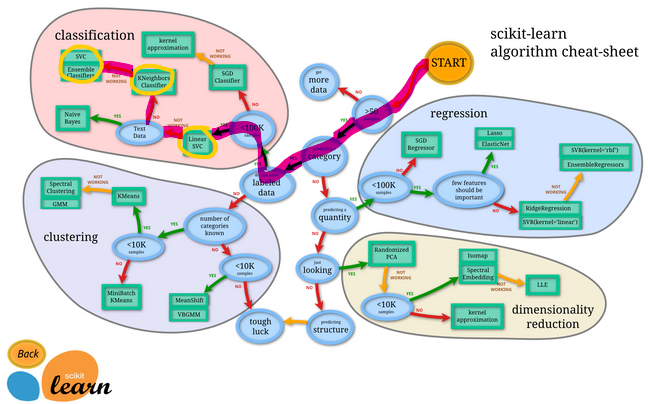

In [ ]:
train_arr = preprocessor.fit_transform(X_train,y_train)
test_arr =  preprocessor.transform(X_test)

### Models to be used
* **SVM**
* **KNN**
* **LOGISTIC REGRESSION** - I have added from my side
* **DT**
* **RF**
* **GaussainNB**

In [ ]:
models = {
    'SVM': SVC(random_state=42,probability=True),
    'KNN': KNeighborsClassifier(),
    'LR': LogisticRegression(random_state=42),
    'DT': DecisionTreeClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'GaussainNB': GaussianNB()
}

model_pipeline = {}

for name, model in models.items():
  pipe = Pipeline(
      steps = [
      ('model', models[name])
      ]
)
  model_pipeline[name] = pipe


In [ ]:
svm_pipeline = model_pipeline['SVM'].fit(train_arr,y_train)
svm_score = cross_val_score(svm_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#svm_score = svm_pipeline.score(test_arr,y_test)


print(f"Accuracy on test set is : {svm_score:.4f}")


Accuracy on test set is : 0.8200


In [ ]:
dt_pipeline = model_pipeline['DT'].fit(train_arr,y_train)
dt_score = cross_val_score(dt_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#dt_score = dt_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {dt_score:.4f}")


Accuracy on test set is : 0.6900


In [ ]:
knn_pipeline = model_pipeline['KNN'].fit(train_arr,y_train)
knn_score = cross_val_score(knn_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#knn_score = knn_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {knn_score:.4f}")

Accuracy on test set is : 0.7900


In [ ]:
rf_pipeline = model_pipeline['RF'].fit(train_arr,y_train)
rf_score = cross_val_score(rf_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#rf_score = rf_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {rf_score:.4f}")

Accuracy on test set is : 0.8200


In [ ]:
gauss_pipeline = model_pipeline['GaussainNB'].fit(train_arr,y_train)
gauss_score = cross_val_score(gauss_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#gauss_score = gauss_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {gauss_score:.4f}")

Accuracy on test set is : 0.8300


In [ ]:
lr_pipeline = model_pipeline['LR'].fit(train_arr,y_train)
lr_score = cross_val_score(lr_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#lr_score = lr_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {lr_score:.4f}")

Accuracy on test set is : 0.8300


## HT


In [ ]:
svm_parameters = {
    'model__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'model__degree': [1,2,3]

}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['SVM'], svm_parameters, cv=5 )
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model',
                 SVC(C=1, degree=1, probability=True, random_state=42))])


{'model__C': 1,
 'model__degree': 1,
 'model__gamma': 'scale',
 'model__kernel': 'rbf'}

In [ ]:
# Define the parameters grid specific to Decision Tree
dt_parameters = {
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['DT'], dt_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_


Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,
                                        random_state=42))])


{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 2}

In [ ]:
# Define the parameters grid specific to KNN
knn_parameters = {
    'model__n_neighbors': list(range(1, 15)),
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['KNN'], knn_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=6, p=1))])


{'model__algorithm': 'auto',
 'model__n_neighbors': 6,
 'model__p': 1,
 'model__weights': 'uniform'}

In [ ]:
rf_parameters = {
    'model__n_estimators': [10, 50, 100],
    'model__max_depth': [None, 2 , 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2, 3],
    'model__criterion': ['gini']
}

grid_search = GridSearchCV(model_pipeline['RF'], rf_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=2, min_samples_leaf=2,
                                        n_estimators=50, random_state=42))])


{'model__criterion': 'gini',
 'model__max_depth': 2,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 2,
 'model__n_estimators': 50}

In [ ]:
# Define the parameters grid specific to Multinomial Naive Bayes
nb_parameters = {
    'model__var_smoothing': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['GaussainNB'], nb_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model', GaussianNB(var_smoothing=1e-07))])


{'model__var_smoothing': 1e-07}

In [ ]:
lr_parameters = {
    'model__penalty': ['l1', 'l2','elasticnet',None],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__max_iter': [100, 200, 300, 400, 500],
}

# Perform GridSearchCV
grid_search = GridSearchCV(model_pipeline['LR'], lr_parameters, cv=5)
grid_search.fit(train_arr, y_train)
print(grid_search.best_estimator_)
grid_search.best_params_

Pipeline(steps=[('model', LogisticRegression(C=0.1, random_state=42))])


{'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l2'}

## EVal

In [ ]:
tuned_models = {
    'SVM': SVC(C=1, degree=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=6, p=1),
    'LR': LogisticRegression(C=0.1, random_state=42),
    'DT': DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42),
    'RF': RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=50, random_state=42),
    'GaussainNB': GaussianNB(var_smoothing=1e-07)
}

tuned_model_pipeline = {}

for name, model in tuned_models.items():
  pipe = Pipeline(
      steps = [
      ('model', tuned_models[name])
      ]
)
  tuned_model_pipeline[name] = pipe


In [ ]:
tuned_svm_pipeline = tuned_model_pipeline['SVM'].fit(train_arr,y_train)
svm_score = cross_val_score(tuned_svm_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#svm_score = tuned_svm_pipeline.score(test_arr,y_test)
print(f"Accuracy on test set is : {svm_score:.4f}")


Accuracy on test set is : 0.8200


In [ ]:
tuned_dt_pipeline = tuned_model_pipeline['DT'].fit(train_arr,y_train)
dt_score = cross_val_score(tuned_dt_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#dt_score = tuned_dt_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {dt_score:.4f}")


Accuracy on test set is : 0.7500


In [ ]:
tuned_knn_pipeline = tuned_model_pipeline['KNN'].fit(train_arr,y_train)
knn_score = cross_val_score(tuned_knn_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#knn_score = tuned_knn_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {knn_score:.4f}")

Accuracy on test set is : 0.7900


In [ ]:
tuned_rf_pipeline = tuned_model_pipeline['RF'].fit(train_arr,y_train)
rf_score = cross_val_score(tuned_rf_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#rf_score = tuned_rf_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {rf_score:.4f}")

Accuracy on test set is : 0.8100


In [ ]:
tuned_gauss_pipeline = tuned_model_pipeline['GaussainNB'].fit(train_arr,y_train)
gauss_score = cross_val_score(tuned_gauss_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#gauss_score = tuned_gauss_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {gauss_score:.4f}")

Accuracy on test set is : 0.8300


In [ ]:
tuned_lr_pipeline = tuned_model_pipeline['LR'].fit(train_arr,y_train)
lr_score = cross_val_score(tuned_lr_pipeline,test_arr,y_test,scoring='accuracy',cv=5).mean()
#lr_score = tuned_lr_pipeline.score(test_arr,y_test)

print(f"Accuracy on test set is : {lr_score:.4f}")

Accuracy on test set is : 0.8300


## Testing

Training SVM...
SVM - Test Accuracy: 0.8200
SVM - Test Precision: 0.8010101010101011
SVM - Test Recall: 0.8355555555555556
SVM - Test F1-score: 0.8194957089693933
SVM - Test AUC-ROC: 0.9084
SVM - Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.86      0.86      0.86        49

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100




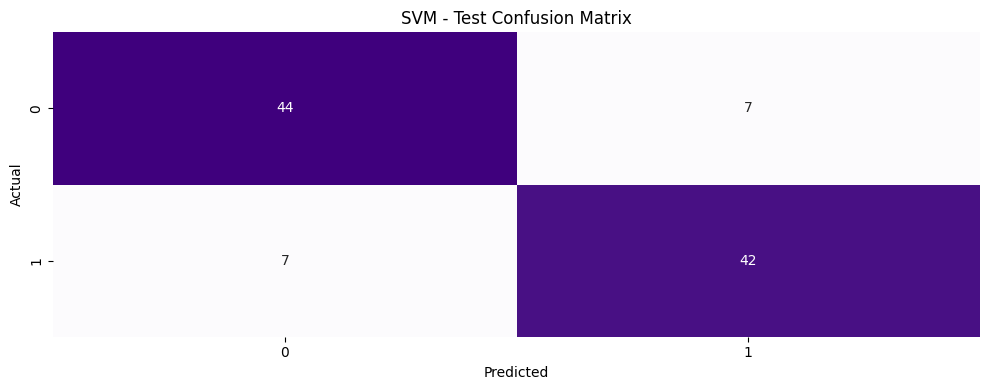

Training KNN...
KNN - Test Accuracy: 0.7900
KNN - Test Precision: 0.8342712842712843
KNN - Test Recall: 0.7133333333333334
KNN - Test F1-score: 0.7864260016467581
KNN - Test AUC-ROC: 0.8890
KNN - Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.86      0.76      0.80        49

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100




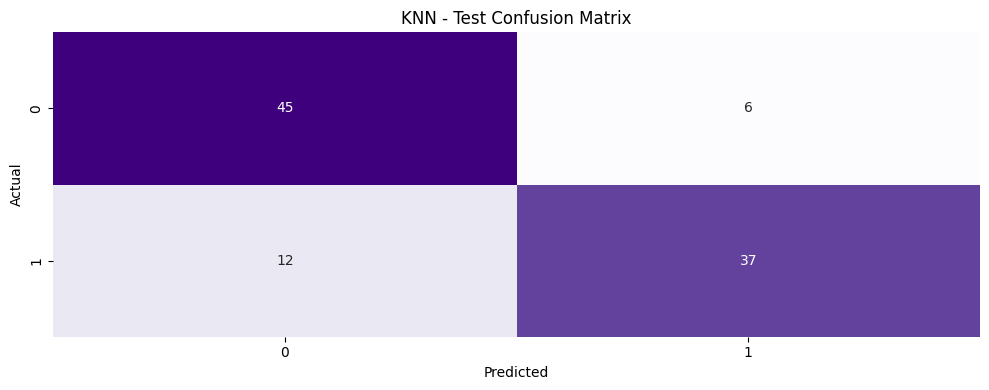

Training LR...
LR - Test Accuracy: 0.8300
LR - Test Precision: 0.8295959595959597
LR - Test Recall: 0.8133333333333332
LR - Test F1-score: 0.8287488542327687
LR - Test AUC-ROC: 0.9148
LR - Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.84      0.86      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100




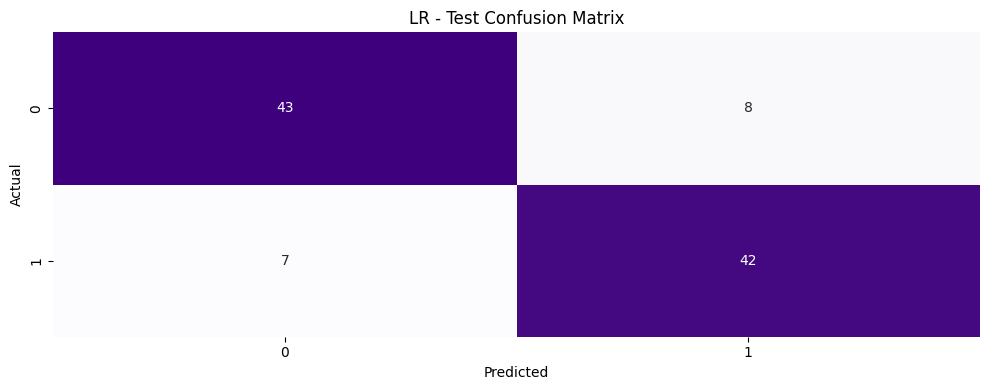

Training DT...
DT - Test Accuracy: 0.7500
DT - Test Precision: 0.7638888888888888
DT - Test Recall: 0.7133333333333333
DT - Test F1-score: 0.747740272171555
DT - Test AUC-ROC: 0.8623
DT - Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.83      0.71      0.77        49

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100




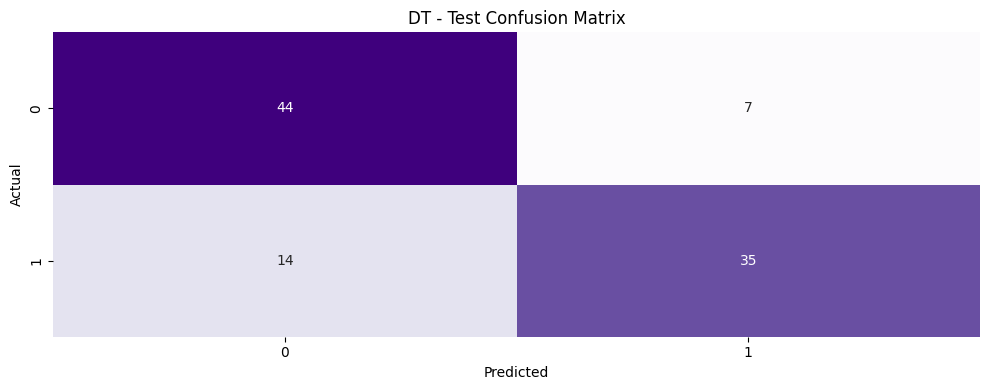

Training RF...
RF - Test Accuracy: 0.8100
RF - Test Precision: 0.821010101010101
RF - Test Recall: 0.7977777777777778
RF - Test F1-score: 0.8094721652616391
RF - Test AUC-ROC: 0.9230
RF - Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        51
           1       0.89      0.84      0.86        49

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100




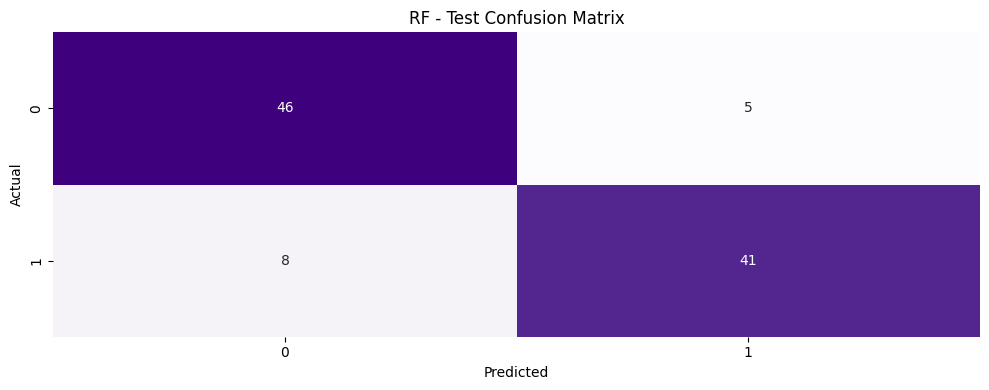

Training GaussainNB...
GaussainNB - Test Accuracy: 0.8300
GaussainNB - Test Precision: 0.8441919191919192
GaussainNB - Test Recall: 0.8155555555555557
GaussainNB - Test F1-score: 0.8285029010564078
GaussainNB - Test AUC-ROC: 0.8928
GaussainNB - Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        51
           1       0.81      0.80      0.80        49

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100




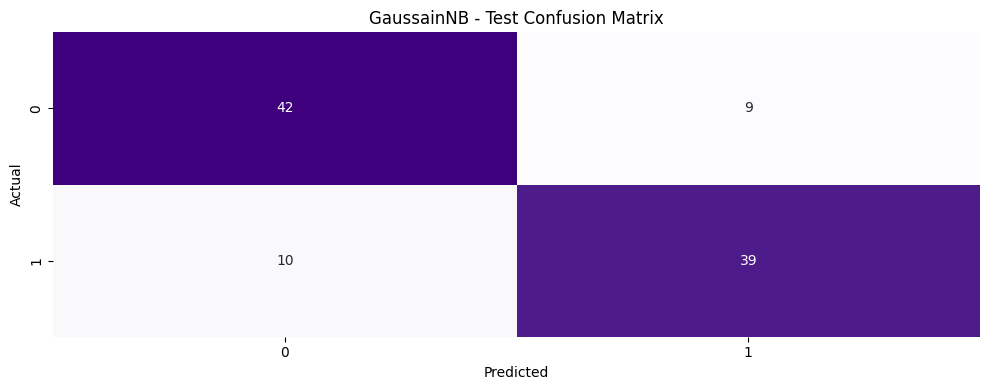

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report


# Perform GridSearchCV for each model
classification_models  = {
    'SVM': SVC(C=1, degree=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=6, p=1),
    'LR': LogisticRegression(C=0.1, random_state=42),
    'DT': DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42),
    'RF': RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=50, random_state=42),
    'GaussainNB': GaussianNB(var_smoothing=1e-07)
}

classification_results = {}

# Evaluate classification models on the performance metrics
for model_name, model in classification_models.items():
    print(f"Training {model_name}...")
    best_model = model.fit(train_arr, y_train)

    y_train_pred = best_model.predict(train_arr)
    y_test_pred = best_model.predict(test_arr)

    #test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='accuracy').mean()

#    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_precision = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='precision').mean()

 #   test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_recall = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='recall').mean()

  #  test_f1 = f1_score(y_test, y_test_pred, average='macro')
    test_f1 = cross_val_score(best_model,test_arr,y_test, cv=5,scoring='f1_macro').mean()

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_test_pred)

    # AUC-ROC score for multiclass
    try:
        y_test_prob = best_model.predict_proba(test_arr)[:, 1]    # Probability for class 1
        test_roc_auc = roc_auc_score(y_test, y_test_prob)
    except AttributeError:
        test_roc_auc = None

    # Classification reports
    test_classification_report = classification_report(y_test, y_test_pred)

    # Storing results of each metric
    classification_results[model_name] = {
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1-score": test_f1,
        "Test AUC-ROC": test_roc_auc,
        "Test Confusion Matrix": cm_test,
        "Test Classification Report": test_classification_report
    }

    # Print metrics
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Test Precision: {test_precision}")
    print(f"{model_name} - Test Recall: {test_recall}")
    print(f"{model_name} - Test F1-score: {test_f1}")

    if test_roc_auc is not None:
        print(f"{model_name} - Test AUC-ROC: {test_roc_auc:.4f}")
    else:
        print(f"{model_name} - AUC-ROC scores could not be computed.")

    print(f"{model_name} - Test Classification Report:\n{test_classification_report}")
    print("=" * 50 + "\n")

    # Plotting confusion matrices
    plt.figure(figsize=(10, 4))

    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f'{model_name} - Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()



Metrics for Classification Models:
           Test Accuracy Test Precision Test Recall Test F1-score Test AUC-ROC
SVM               0.8200         0.8010      0.8356        0.8195       0.9084
KNN               0.7900         0.8343      0.7133        0.7864       0.8890
LR                0.8300         0.8296      0.8133        0.8287       0.9148
DT                0.7500         0.7639      0.7133        0.7477       0.8623
RF                0.8100         0.8210      0.7978        0.8095       0.9230
GaussainNB        0.8300         0.8442      0.8156        0.8285       0.8928


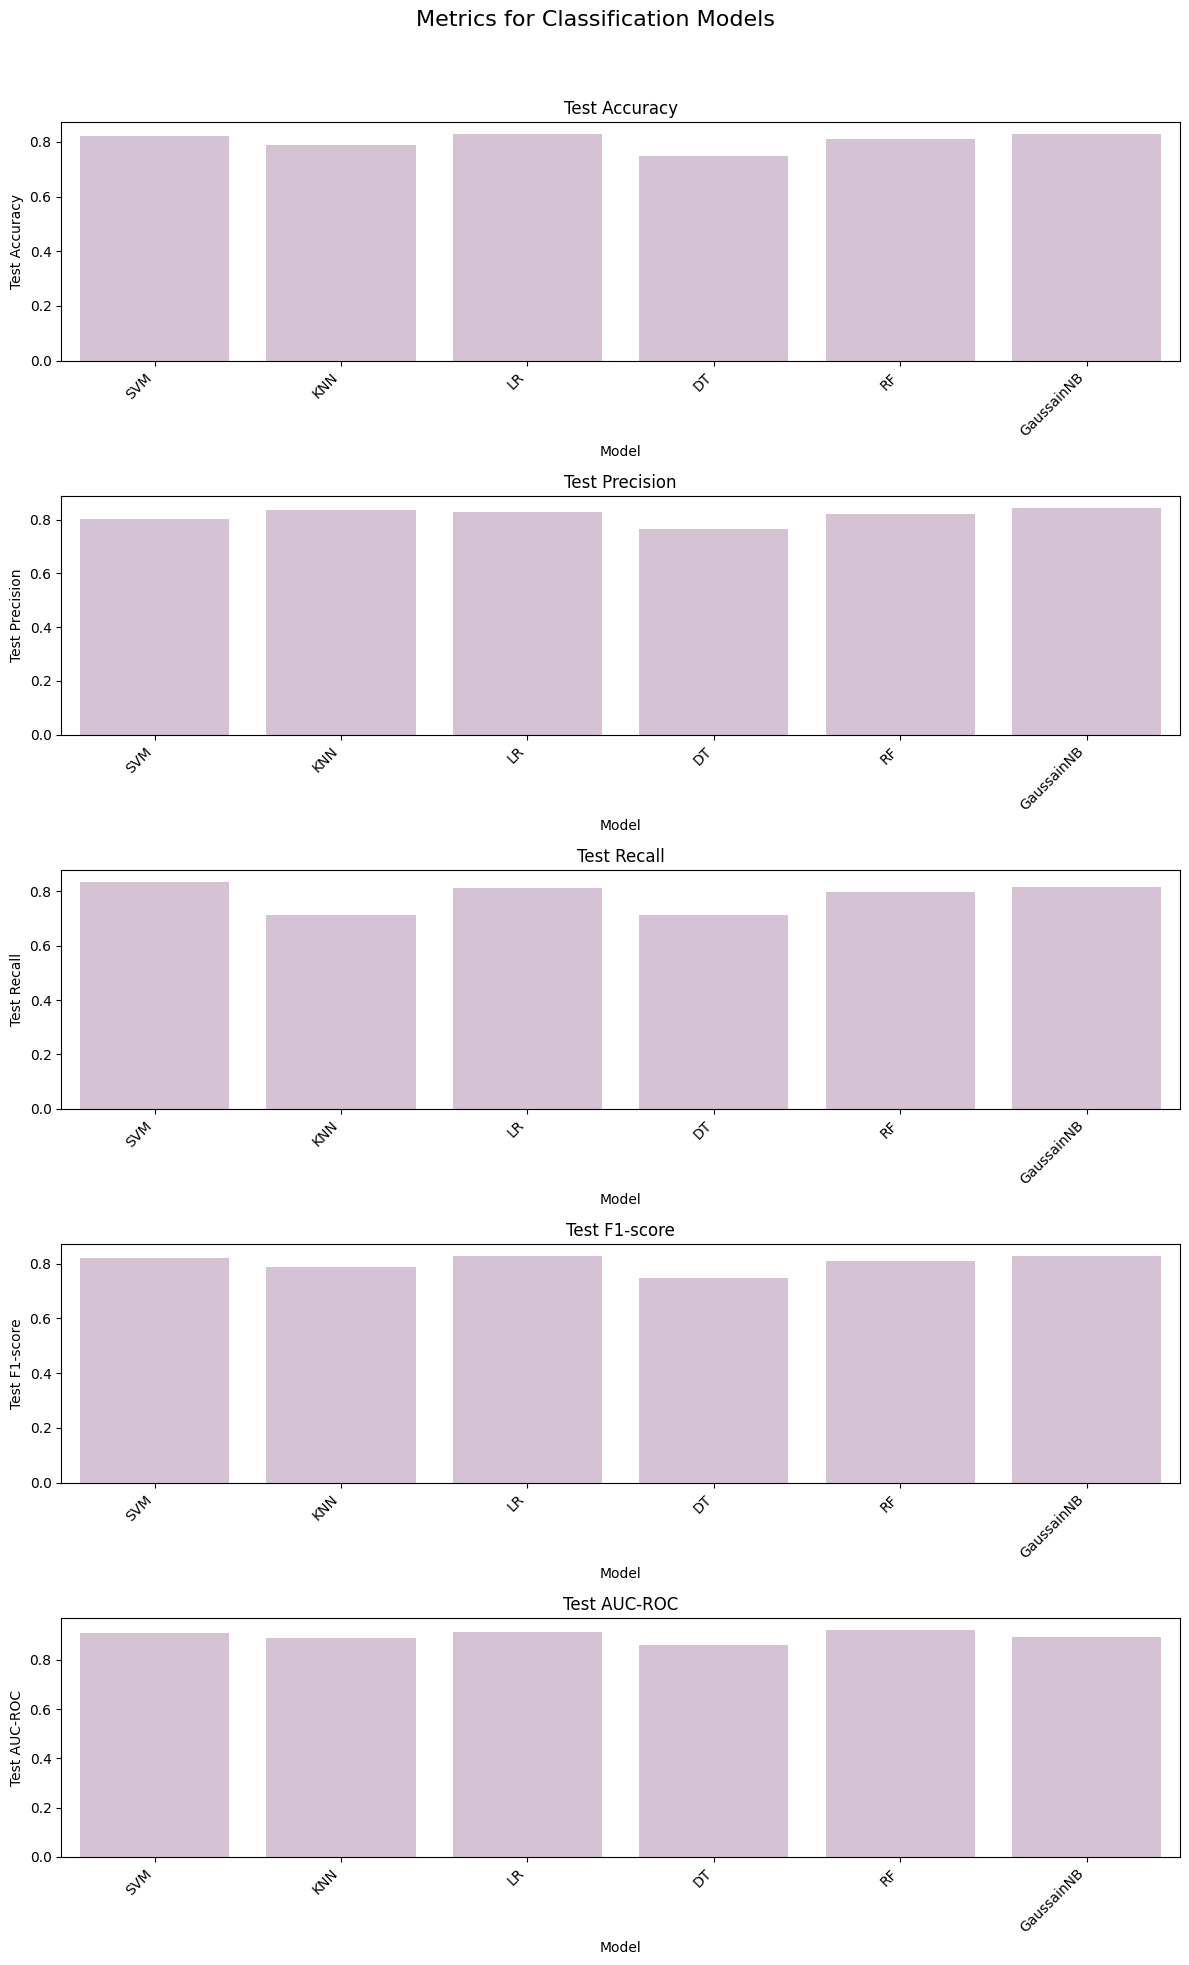

In [ ]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(classification_results).T

# Format DataFrame to show only relevant metrics
metrics_df = metrics_df[[
    "Test Accuracy",
    "Test Precision",
    "Test Recall",
    "Test F1-score",
    "Test AUC-ROC",
]]

# Print formatted table
print("\nMetrics for Classification Models:")
print("=" * 100)
print(metrics_df.to_string(float_format="{:.4f}".format))
print("=" * 100)


# Plotting the metrics
fig, axes = plt.subplots(5, 1, figsize=(12, 20))
fig.suptitle('Metrics for Classification Models', fontsize=16)

# Plot each metric
metrics_list = [
    ("Test Accuracy", "Test Accuracy"),
    ("Test Precision", "Test Precision"),
    ("Test Recall", "Test Recall"),
    ("Test F1-score", "Test F1-score"),
    ("Test AUC-ROC", "Test AUC-ROC"),
]

for ax, (metric, title) in zip(axes.flatten(), metrics_list):
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], ax=ax, color='#D8BFD8')
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(metrics_df.index)))
    ax.set_xticklabels(metrics_df.index, rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
from termcolor import colored

# Ensure relevant columns are numeric
numeric_cols = [
     "Test Accuracy",
     "Test Precision",
     "Test Recall",
     "Test F1-score",
     "Test AUC-ROC"
]
metrics_df[numeric_cols] = metrics_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Find the best models based on different metrics
best_accuracy_model = metrics_df.loc[metrics_df['Test Accuracy'].idxmax()]
best_precision_model = metrics_df.loc[metrics_df['Test Precision'].idxmax()]
best_recall_model = metrics_df.loc[metrics_df['Test Recall'].idxmax()]
best_f1_model = metrics_df.loc[metrics_df['Test F1-score'].idxmax()]
best_auc_roc_model = metrics_df.loc[metrics_df['Test AUC-ROC'].idxmax()]

# Find the worst models based on different metrics
worst_accuracy_model = metrics_df.loc[metrics_df['Test Accuracy'].idxmin()]
worst_precision_model = metrics_df.loc[metrics_df['Test Precision'].idxmin()]
worst_recall_model = metrics_df.loc[metrics_df['Test Recall'].idxmin()]
worst_f1_model = metrics_df.loc[metrics_df['Test F1-score'].idxmin()]
worst_auc_roc_model = metrics_df.loc[metrics_df['Test AUC-ROC'].idxmin()]


def print_colored(text, color):
    colors = {
        'green': '\033[92m',
        'red': '\033[91m',
        'bold': '\033[1m',
        'end': '\033[0m'
    }
    return f"{colors[color]}{text}{colors['end']}"

# Summary of Best Models
print(print_colored("\nSummary of Best Models:",'bold'))
print(print_colored(f"Best by Accuracy: {best_accuracy_model.name} with {best_accuracy_model['Test Accuracy']:.4f}", 'green'))
print(print_colored(f"Best by Precision: {best_precision_model.name} with {best_precision_model['Test Precision']:.4f}", 'green'))
print(print_colored(f"Best by Recall: {best_recall_model.name} with {best_recall_model['Test Recall']:.4f}", 'green'))
print(print_colored(f"Best by F1-score: {best_f1_model.name} with {best_f1_model['Test F1-score']:.4f}", 'green'))
print(print_colored(f"Best by AUC-ROC: {best_auc_roc_model.name} with {best_auc_roc_model['Test AUC-ROC']:.4f}", 'green'))

print(print_colored("\nSummary of Worst Models:",'bold'))
print(print_colored(f"Worst by Accuracy: {worst_accuracy_model.name} with {worst_accuracy_model['Test Accuracy']:.4f}",'red'))
print(print_colored(f"Worst by Precision: {worst_precision_model.name} with {worst_precision_model['Test Precision']:.4f}","red"))
print(print_colored(f"Worst by Recall: {worst_recall_model.name} with {worst_recall_model['Test Recall']:.4f}", "red"))
print(print_colored(f"Worst by F1-score: {worst_f1_model.name} with {worst_f1_model['Test F1-score']:.4f}", "red"))
print(print_colored(f"Worst by AUC-ROC: {worst_auc_roc_model.name} with {worst_auc_roc_model['Test AUC-ROC']:.4f}","red"))



Summary of Best Models:
Best by Accuracy: LR with 0.8300
Best by Precision: GaussainNB with 0.8442
Best by Recall: SVM with 0.8356
Best by F1-score: LR with 0.8287
Best by AUC-ROC: RF with 0.9230

Summary of Worst Models:
Worst by Accuracy: DT with 0.7500
Worst by Precision: DT with 0.7639
Worst by Recall: DT with 0.7133
Worst by F1-score: DT with 0.7477
Worst by AUC-ROC: DT with 0.8623
